<a href="https://colab.research.google.com/github/K-myeongji/kakaotalk/blob/main/%EA%B0%80%EC%84%A4%EA%B2%80%EC%A0%95_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 형태소 분석기 실행 - konlpy

In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Stemming & Lemmatization 실행

- Stemming 은 Hannanum을 사용함  --> 이렇게 뭐 썼는지 정리하기
- 너무 잘게 쪼개져서 Stemming랑 Lemmatization 둘 다 주석처리 해놓음.



In [ ]:
from konlpy.tag import Hannanum
from konlpy.tag import Okt
import pandas as pd

# 형태소 분석기 객체 생성
hannanum = Hannanum()
tokenizer = Okt()


# 형태소 분석 함수 정의
def analyze_text(text):
    tokens = tokenizer.pos(text)
    words = [word for word, pos in tokens if pos.startswith('N') or pos.startswith('V') or pos.startswith('Adjective') or pos.startswith('Adverb')]
    return words

# 전처리 및 토큰화 함수 정의
def preprocess_text(text):
    tokens = analyze_text(text)  # 형태소 분석
    tokens = remove_stopwords(tokens)  # 불용어 처리
    # tokens = stem(tokens)  # Stemming 적용
    # tokens = lemmatize(tokens)  # Lemmatization 적용
    return tokens

# 불용어 처리 함수 정의
def remove_stopwords(tokens):
    stopwords = ['있', '하', '것', '들', '되', '수', '보', '주', '등', '한', '지', '대해', '및', '에', '얘', '오늘', '근데', '나도', '디', '함',
                 '와', '과', '네', '들', '듯', '게', '도', '지', '고', '아', '어', '음', '어서', '어요', '으니', '하는', '하고', '할', '옹',
                 '는데', '습니다', '면서', '입니다', '으로', '까지', '이다', '이면', '해', '다', '진짜', '이', '야', '우',
                 '거', '나', '우리', '네가', '언니', '오빠', '형', '누나', '엄마', '아빠', '내', '난', '너','효림','예진','명지','주영','다연','효빈','민정','주영',
                 '민경','지은','채원','민서','준희','호정']
    filtered_tokens = [token for token in tokens if token not in stopwords]
    return filtered_tokens

def preprocess_text(text):
    tokens = analyze_text(text)  # 형태소 분석
    tokens = remove_stopwords(tokens)  # 불용어 처리

    # POS 태깅 적용
    pos_tags = tokenizer.pos(text)
    pos_tags = [(word, pos) for word, pos in pos_tags if pos.startswith('N') or pos.startswith('V') or pos.startswith('Adjective') or pos.startswith('Adverb')]

    return tokens, pos_tags

# 토큰화 및 불용어 처리
df_sep['tokens'], df_sep['pos_tags'] = zip(*df_sep['text'].apply(preprocess_text))

# 결과 출력
df_sep

In [ ]:
df_sep = df_sep[df_sep['user_name'] == '**']
df_sep['user_name'] = 'ab12'
df_sep = df_sep[['date_time', 'user_name', 'text']]
df_sep = df_sep.drop([1, 6]).reset_index(drop=True)

In [ ]:
df_sep

In [ ]:
from konlpy.tag import Okt
import pandas as pd

# 형태소 분석기 객체 생성
tokenizer = Okt()

# 형태소 분석 함수 정의
def analyze_text(text):
    tokens = tokenizer.pos(text)
    words = [word for word, pos in tokens if pos.startswith('N') or pos.startswith('V') or pos.startswith('Adjective') or pos.startswith('Adverb')]
    return words


# 불용어 처리 함수 정의
def remove_stopwords(tokens):
    stopwords = ['있', '하', '것', '들', '되', '수', '보', '주', '등', '한', '지', '대해', '및', '에', '얘', '오늘', '근데', '나도', '디', '함', '와', '과', '네',
                 '들', '듯', '게', '도', '지', '고', '아', '어', '음', '어서', '어요', '으니', '하는', '하고', '할', '옹', '는데', '습니다', '면서', '입니다',
                 '으로', '까지', '이다', '이면', '해', '다', '진짜', '이', '야', '우', '거', '나', '우리', '네가', '언니', '오빠', '형', '누나', '엄마',
                 '아빠', '내', '난', '너']
    filtered_tokens = [token for token in tokens if token not in stopwords]
    return filtered_tokens

def preprocess_text(text):
    tokens = analyze_text(text)  # 형태소 분석
    tokens = remove_stopwords(tokens)  # 불용어 처리

    # POS 태깅 적용
    pos_tags = tokenizer.pos(text)
    pos_tags = [(word, pos) for word, pos in pos_tags if pos.startswith('N') or pos.startswith('V') or pos.startswith('Adjective') or pos.startswith('Adverb')]

    return tokens, pos_tags

# 토큰화 및 불용어 처리
df_sep['tokens'], df_sep['pos_tags'] = zip(*df_sep['text'].apply(preprocess_text))

# 결과 출력
df_sep

#### 데이터 시각화 -> 둘 중 하나? 둘다?
- matplotlib
- Word Cloud

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!pip install wordcloud matplotlib


In [ ]:
from nltk import FreqDist
import matplotlib.pyplot as plt
# 토큰 빈도수 계산
all_tokens = [token for tokens in df_sep['tokens'] for token in tokens]  # 모든 토큰을 하나의 리스트로 변환
freq_dist = FreqDist(all_tokens)  # 토큰의 빈도수 계산

# 상위 빈도 단어 추출
top_words = freq_dist.most_common(10)  # 빈도수가 가장 높은 상위 10개 단어 추출

print(top_words)

plt.rc('font', family='NanumBarunGothic')

# 그래프 그리기
freq_dist.plot(20)  # 상위 20개 단어의 빈도 분포 그래프
plt.show()


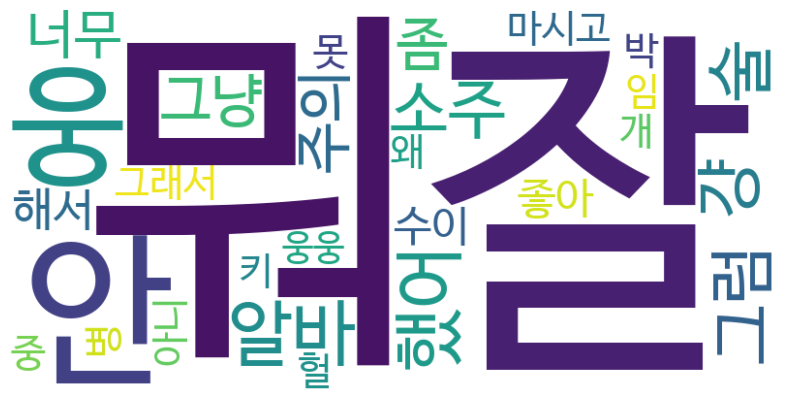

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import font_manager

# Combine all tokens into a single string
all_text = ' '.join([' '.join(tokens) for tokens in df_sep['tokens']])

# Find the path of the installed Nanum font
font_path = font_manager.findfont(font_manager.FontProperties(family='NanumBarunGothic'))

# Generate the Word Cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    font_path=font_path,  # 폰트 설정 - 한국어라
    max_words = 30,
    prefer_horizontal=0.9
).generate(all_text)

# Plot the Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
#결과를 파일로 만들기
df_sep.to_csv(os.path.join(down_path, "katalk_data_merged_"+ file_name +".csv"), index=False)

#사용자 별로 톡한 횟수
df_sep['user_name'].value_counts()

# 2. train data 전처리

In [ ]:
from konlpy.tag import Okt
from konlpy.tag import Kkma
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
import pandas as pd
import re
import numpy as np


In [ ]:
# 형태소 분석기 객체 생성
tokenizer = Okt()
kkma = Kkma()

# 형태소 분석 함수 정의
def analyze_text(text):
    tokens = tokenizer.pos(text)
    words = [word for word, pos in tokens if pos.startswith('N') or pos.startswith('V') or pos.startswith('Adjective') or pos.startswith('Adverb')]
    return words

# 불용어 처리 함수 정의
def remove_stopwords(tokens):
    stopwords = ['있', '하', '것', '들', '되', '수', '보', '주', '등', '한', '지', '대해', '및', '에', '얘', '오늘', '근데', '나도', '디', '함',
                 '와', '과', '네', '들', '듯', '게', '도', '지', '고', '아', '어', '음', '어서', '어요', '으니', '하는', '하고', '할', '옹',
                 '는데', '습니다', '면서', '입니다', '으로', '까지', '이다', '이면', '해', '다', '진짜', '이', '야', '우', '요', '걸',
                 '거', '나', '우리', '네가', '언니', '오빠', '형', '누나', '엄마', '아빠', '내', '난', '너','효림','예진','명지','주영','다연','효빈','민정','주영',
                 '민경','지은','채원','민서','준희','호정']
    meaningful_words = [token for token in tokens if token not in stopwords]
    return meaningful_words

# 전처리 및 토큰화 함수 정의
def preprocess_text(text):
    tokens = analyze_text(text)  # 형태소 분석
    tokens = remove_stopwords(tokens)  # 불용어 처리
    return tokens

# Train 데이터 불러오기
train_df = pd.read_excel(train_path)

# 칼럼 삭제 및 순서 변경
train_df = train_df[['text', 'score']]

# 한글 외 문자 제거
train_df['text'] = train_df['text'].apply(lambda x: re.sub(r'[^ ㄱ-ㅣ가-힣]+', " ", x))

# 토큰화 및 불용어 처리
train_df['tokens'] = train_df['text'].apply(preprocess_text)
train_df = train_df[['text', 'score', 'tokens']]
train_df

In [ ]:
# Word2Vec 모델 학습
sentences = train_df['tokens'].tolist()
model = Word2Vec(sentences, vector_size=100, window=10, min_count=8, workers=4, sg=1)

# 문장 벡터화 함수 정의
def vectorize_text(tokens):
    vectors = []
    for token in tokens:
        if token in model.wv:
            vectors.append(model.wv[token])
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return None

# 텍스트 벡터화
train_df['vectors'] = train_df['tokens'].apply(vectorize_text)

# None을 가지는 행 제거
train_df = train_df.dropna()

# Train/Test 데이터 분리
train_x, test_x, train_y, test_y = train_test_split(train_df['vectors'].tolist(), train_df['score'], test_size=0.2, random_state=0)

# 로지스틱 회귀 모델 학습 및 최적 하이퍼파라미터 탐색
clf = LogisticRegression(random_state=0)
params = {'C': [15, 18, 19, 20, 22]}
grid_cv = GridSearchCV(clf, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv.fit(train_x, train_y)

In [ ]:
# 로지스틱 회귀 모델 학습 및 최적 하이퍼파라미터 탐색
clf = LogisticRegression(random_state=0)
params = {'C': [15, 18, 19, 20, 22]}
grid_cv = GridSearchCV(clf, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv.fit(train_x, train_y)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
test_predict = grid_cv.best_estimator_.predict(test_x)


# 정확도 계산
accuracy = accuracy_score(test_y, test_predict)
print('감성 분류 모델의 정확도:', round(accuracy, 3))

# 정밀도 계산
precision = precision_score(test_y, test_predict, average='macro')
print('감성 분류 모델의 정밀도:', round(precision, 3))

# 재현율 계산
recall = recall_score(test_y, test_predict, average='macro')
print('감성 분류 모델의 재현율:', round(recall, 3))

# F1 스코어 계산
f1 = f1_score(test_y, test_predict, average='macro')
print('감성 분류 모델의 F1 스코어:', round(f1, 3))

감성 분류 모델의 정확도: 0.88
감성 분류 모델의 정밀도: 0.829
감성 분류 모델의 재현율: 0.724
감성 분류 모델의 F1 스코어: 0.759


In [ ]:
# import matplotlib.pyplot as plt

# # Count the occurrences of each score value
# score_counts = train_df['score'].value_counts()

# # Create a pie chart
# plt.figure(figsize=(6, 6))
# plt.pie(score_counts, labels=score_counts.index, autopct='%1.1f%%')
# plt.title('Score Distribution')
# plt.show()

In [ ]:
# # 로지스틱 회귀 모델 학습 및 최적 하이퍼파라미터 탐색
# clf = LogisticRegression(random_state=0)
# params = {'C': [15, 18, 19, 20, 22]}
# grid_cv = GridSearchCV(clf, param_grid=params, cv=3, scoring='accuracy', verbose=1)
# grid_cv.fit(train_x, train_y)

# 2)카카오톡 데이터로 실행

In [ ]:
import pandas as pd
import re

# 엑셀 파일 읽기
# df=pd.read_excel('<파일명>')
df = pd.read_csv(os.path.join(down_path, "katalk_data_merged_"+ file_name +".csv"))

df

In [ ]:
#데이터 프레임에서 보고자하는 친구 이름 선택, 지정
df = pd.DataFrame(df[df['user_name'] == name])
df

In [ ]:
import pandas as pd

# 대화량을 맞추기 위한 예시 코드
def adjust_conversation_length(df, num_sentences):
    adjusted_df = pd.DataFrame(columns=df.columns)
    for user_name in df['user_name'].unique():
        user_df = df[df['user_name'] == user_name]
        if len(user_df) > num_sentences:
            user_df = user_df.sample(num_sentences, random_state=0)
        elif len(user_df) < num_sentences:
            user_df = pd.concat([user_df] * (num_sentences // len(user_df) + 1)).head(num_sentences)
        adjusted_df = pd.concat([adjusted_df, user_df])
    return adjusted_df

# 대화량을 맞춰줄 최대 대화문장 수 (예시에서는 100으로 설정)
max_sentences = 300

# adjust_conversation_length 함수를 사용하여 대화량 맞춤
df = adjust_conversation_length(df, max_sentences)

# 대화량 맞춘 데이터프레임 확인
df



In [ ]:
# # 문장 열에서 문장들을 가져와서 감정 분석 함수 실행
# sentiments = []
# for sentence in df['text']:
#   # 입력 텍스트에 대한 전처리 수행
#   words = re.compile(r'[ㄱ-ㅣ가-힣0-9]+').findall(sentence)
#   sentence = [" ".join(words)]
#   # 감정 분석 함수 실행
#   st_tfidf = tfv.transform(sentence)
#   sentiment = grid_cv.best_estimator_.predict(st_tfidf)
#   sentiments.append(sentiment)
# #함수 실행 결과를 데이터 프레임의 감정이라는 셀을 만들고 저장
# df['감정'] = sentiments
# #만들어진 데이터 프레임 저장
# df

# 문장 열에서 문장들을 가져와서 감정 분석 함수 실행
sentiments = []
for sentence in df['text']:
    # 입력 텍스트에 대한 전처리 수행
    words = re.compile(r'[ㄱ-ㅣ가-힣0-9]+').findall(sentence)
    sentence = [" ".join(words)]
    # 감정 분석 함수 실행
    tokens = preprocess_text(sentence[0])
    vectors = vectorize_text(tokens)
    if vectors is not None:
        sentiment = grid_cv.best_estimator_.predict([vectors])
    else:
        sentiment = None
    sentiments.append(sentiment)

# 함수 실행 결과를 데이터 프레임의 감정이라는 셀을 만들고 저장
df['감정'] = sentiments
df


In [ ]:
# 전체 문장 수
total_sentences = len(df)

# 0인 감정 분석 결과 수
negative_count = len(df[df['감정'] == 0])

# 0인 비율 계산
negative_ratio = negative_count / total_sentences

print(f"전체 문장 수: {total_sentences}")
print(f"0인 감정 분석 결과 수: {negative_count}")
print(f"0인 비율: {negative_ratio:.2%}")

전체 문장 수: 300
0인 감정 분석 결과 수: 67
0인 비율: 22.33%


## 3) 각 결과 데이터프레임으로 저장

---




In [ ]:
import pandas as pd
import os

data = {
    'name': [file_name],
    'total_sentences': [total_sentences],
    'negative_count': [negative_count],
    'negative_ratio': [negative_ratio]
}

df_result = pd.DataFrame(data)
file_path = os.path.join(final_path, final_name + '.csv')

if os.path.exists(file_path):
    df_result.to_csv(file_path, mode='a', header=False, index=False)
else:
    df_result.to_csv(file_path, index=False)


# CSV 파일을 데이터프레임으로 불러오기
df_loaded = pd.read_csv(file_path)
df_loaded






NameError: ignored

# 3. 결과 확인 및 가설 검정

## 1) 결과를 그래프로 나타낸다.

## 2) 가설검정을 시행한다
- 각 그룹 간 차이를 ANOVA로 시행 (그룹이 2개가 아니니까)

In [ ]:
# ---------------- 설문 결과 데이터프레임으로 불러오기 -------------------
survey_df = pd.read_csv(survey_path + survey_name)

# 'user_name'과 '설문 합계' 칼럼만 남기기
survey_df = survey_df[['user_name', '설문 합계']]

# '설문 합계' 칼럼의 이름을 영어 변수명으로 변경
survey_df = survey_df.rename(columns={'설문 합계': 'survey_Total'})

# 결과 확인
survey_df

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

file_path_indi = os.path.join(final_path, final_name + '_indi.csv')
file_path_group = os.path.join(final_path, final_name + '_group.csv')

# CSV 파일을 데이터프레임으로 불러오기
df_loaded = pd.read_csv(file_path_indi)

# Subset을 위한 조건 설정
sur_df = df_loaded.copy()
sur_df['survey_Total'] = sur_df['name'].apply(lambda x: survey_df.loc[survey_df['user_name'] == x[:-3], 'survey_Total'].values[0])

# Subset을 위한 Self-esteem Group 조건 설정
sur_df['Self-esteem Group'] = pd.cut(sur_df['survey_Total'],
                                    bins=[-float('inf'), 14, 29, float('inf')],
                                    labels=['Low Self-Esteem', 'Average Self-Esteem', 'High Self-Esteem'])

# Subset 조건을 만족하는 데이터프레임 생성
subset_df = sur_df[sur_df['name'].isin(survey_df['user_name'] + '_개인')]

# Create the graph
sns.barplot(x='Self-esteem Group', y='negative_ratio', data=subset_df, ci=None)
plt.xlabel('Group')
plt.ylabel('Average Negative Language Ratio')
plt.title('Negative Language Ratio by Self-esteem Group')

# Calculate the mean and standard deviation
subset_mean = subset_df['negative_ratio'].mean()
subset_std = subset_df['negative_ratio'].std()

# Plot the mean and standard deviation lines
plt.axhline(subset_mean, color='red', linestyle='-', label='Group Mean')
plt.axhline(subset_mean + subset_std, color='red', linestyle='--', label='Mean + Std Dev')
plt.axhline(subset_mean - subset_std, color='red', linestyle='--', label='Mean - Std Dev')

plt.legend()

plt.show()

print('')
print('')
low_self_esteem_mean = subset_df[subset_df['Self-esteem Group'] == 'Low Self-Esteem']['negative_ratio'].mean()
average_self_esteem_mean = subset_df[subset_df['Self-esteem Group'] == 'Average Self-Esteem']['negative_ratio'].mean()
high_self_esteem_mean = subset_df[subset_df['Self-esteem Group'] == 'High Self-Esteem']['negative_ratio'].mean()

print('<부정적 언어 사용 비율의 각 그룹 별 평균값>')
print('낮은 자아존중감 그룹의 부정적 언어 사용 비율(평균값): {:.5f}'.format(low_self_esteem_mean))
print('보통 수준 자아존중감 그룹의 부정적 언어 사용 비율(평균값): {:.5f}'.format(average_self_esteem_mean))
print('높은 자아존중감 그룹의 부정적 언어 사용 비율(평균값): {:.5f}'.format(high_self_esteem_mean))


## 2) 가설검정을 시행한다
- 각 그룹 간 차이를 ANOVA로 시행 (그룹이 2개가 아니니까)

In [ ]:
# 자아존중감이 낮은 그룹 데이터
low_self_esteem = subset_df[subset_df['Self-esteem Group'] == 'Low Self-Esteem']['negative_ratio']

# 평균 자아존중감인 그룹 데이터
average_self_esteem = subset_df[subset_df['Self-esteem Group'] == 'Average Self-Esteem']['negative_ratio']

# 자아존중감이 높은 그룹 데이터
high_self_esteem = subset_df[subset_df['Self-esteem Group'] == 'High Self-Esteem']['negative_ratio']

# 일원 분산분석 수행
f_statistic, p_value = stats.f_oneway(low_self_esteem, average_self_esteem, high_self_esteem)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

alpha = 0.05  # 유의수준 설정

print('')

if p_value < alpha:
    print("유의미한 결과: 세 그룹 간의 부정적 언어 사용 비율에 차이가 있습니다.")
else:
    print("유의미하지 않은 결과: 세 그룹 간의 부정적 언어 사용 비율에 차이가 없습니다.")



F-statistic: 22.215912784705342
p-value: 1.0622841670227049e-05

유의미한 결과: 세 그룹 간의 부정적 언어 사용 비율에 차이가 있습니다.


<단체 개인 차이 확인>

In [ ]:
file_path_indi = os.path.join(final_path, final_name + '_indi.csv')
file_path_group = os.path.join(final_path, final_name + '_group.csv')

df_group = pd.read_csv(file_path_group)
df_indi = pd.read_csv(file_path_indi)
df_indi

In [ ]:
# 자아존중감 그룹 설정
df_indi['survey_Total'] = df_indi['name'].apply(lambda x: survey_df.loc[survey_df['user_name'] == x[:-3], 'survey_Total'].values[0])
df_group['survey_Total'] = df_group['name'].apply(lambda x: survey_df.loc[survey_df['user_name'] == x[:-3], 'survey_Total'].values[0])

# Subset을 위한 Self-esteem Group 조건 설정
df_indi['Self-esteem Group'] = pd.cut(df_indi['survey_Total'],
                                    bins=[-float('inf'), 14, 29, float('inf')],
                                    labels=['Low Self-Esteem', 'Average Self-Esteem', 'High Self-Esteem'])
df_group['Self-esteem Group'] = pd.cut(df_group['survey_Total'],
                                    bins=[-float('inf'), 14, 29, float('inf')],
                                    labels=['Low Self-Esteem', 'Average Self-Esteem', 'High Self-Esteem'])

## 1) 단체 - 개인 : 전체

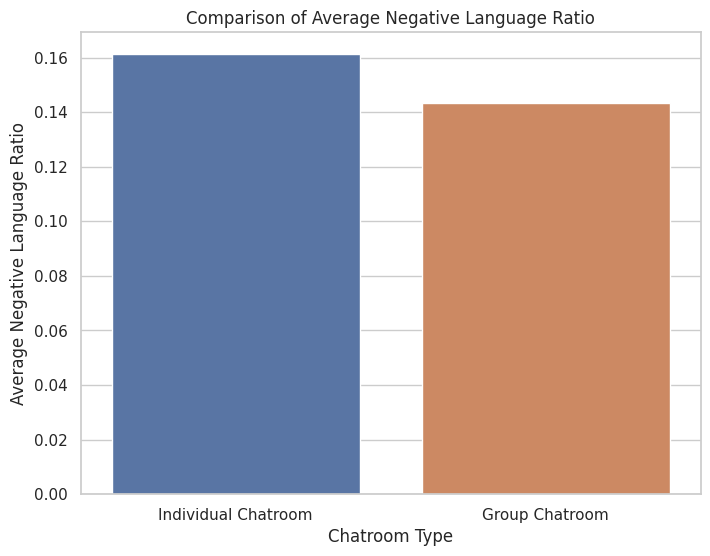

<채팅방 유형에 따른 부정적 언어 사용 비율 - 전체 참가자에 대한>
개인 채팅방에서의 부정적 언어 사용 비율(평균값): 0.16121
단체 채팅방에서의 부정적 언어 사용 비율(평균값): 0.14348
부정적 언어 사용 비율의 평균값 차이: 0.01773


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

indi_mean = df_indi['negative_ratio'].mean()
group_mean = df_group['negative_ratio'].mean()

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=['Individual Chatroom', 'Group Chatroom'], y=[indi_mean, group_mean], ax=ax)
ax.set_xlabel('Chatroom Type')
ax.set_ylabel('Average Negative Language Ratio')
ax.set_title('Comparison of Average Negative Language Ratio')


mean_diff = indi_mean - group_mean

plt.show()

# Print the results
print('<채팅방 유형에 따른 부정적 언어 사용 비율 - 전체 참가자에 대한>')
print('개인 채팅방에서의 부정적 언어 사용 비율(평균값): {:.5f}'.format(indi_mean))
print('단체 채팅방에서의 부정적 언어 사용 비율(평균값): {:.5f}'.format(group_mean))
print('부정적 언어 사용 비율의 평균값 차이: {:.5f}'.format(mean_diff))


In [ ]:
import scipy.stats as stats

t_statistic, p_value = stats.ttest_ind(df_indi['negative_ratio'], df_group['negative_ratio'])

alpha = 0.05

print("T-statistic: {:.5f}".format(t_statistic))
print("p-value: {:.5f}".format(p_value))

if p_value < alpha:
    print("유의미한 결과: 두 그룹 간의 부정적 언어 사용 비율에 차이가 있습니다.")
else:
    print("유의미하지 않은 결과: 두 그룹 간의 부정적 언어 사용 비율에 차이가 없습니다.")

T-statistic: 1.24737
p-value: 0.21917
유의미하지 않은 결과: 두 그룹 간의 부정적 언어 사용 비율에 차이가 없습니다.


## 2) 단체-개인: 낮은 자아존중감 그룹

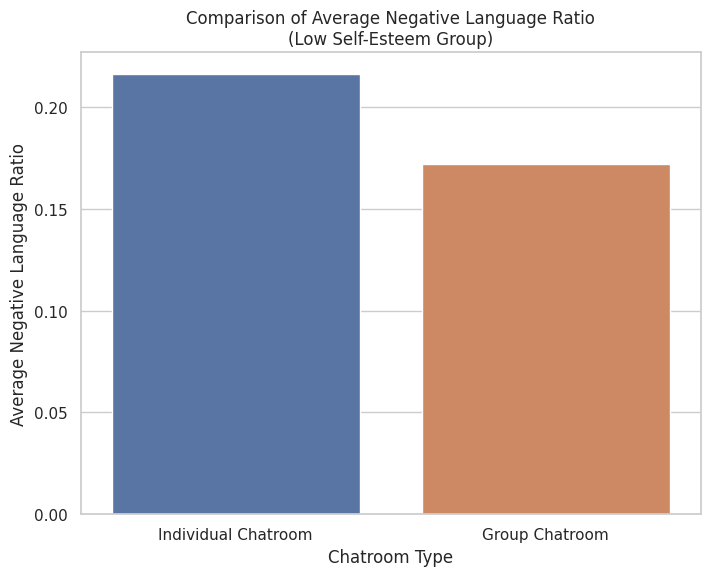

<채팅방 유형에 따른 부정적 언어 사용 비율 - 낮은 자아존중감 그룹에 속하는 참가자만>
개인 채팅방에서의 부정적 언어 사용 비율(평균값): 0.21619
단체 채팅방에서의 부정적 언어 사용 비율(평균값): 0.17190
부정적 언어 사용 비율의 평균값 차이: 0.04429


In [ ]:
## 낮은 자아존중감 그룹(7명)에 대한 개인 채팅방 vs 단체 채팅방 차


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Select only the rows with Low Self-Esteem in Self-esteem Group column
df_indi_low_self_esteem = df_indi[df_indi['Self-esteem Group'] == 'Low Self-Esteem']
df_group_low_self_esteem = df_group[df_group['Self-esteem Group'] == 'Low Self-Esteem']

# Calculate the average negative language ratio for each dataset
indi_low_self_esteem_mean = df_indi_low_self_esteem['negative_ratio'].mean()
group_low_self_esteem_mean = df_group_low_self_esteem['negative_ratio'].mean()

# Visualize the comparison
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=['Individual Chatroom', 'Group Chatroom'], y=[indi_low_self_esteem_mean, group_low_self_esteem_mean], ax=ax)
ax.set_xlabel('Chatroom Type')
ax.set_ylabel('Average Negative Language Ratio')
ax.set_title('Comparison of Average Negative Language Ratio\n(Low Self-Esteem Group)')
plt.show()

# Print the results
print('<채팅방 유형에 따른 부정적 언어 사용 비율 - 낮은 자아존중감 그룹에 속하는 참가자만>')
print('개인 채팅방에서의 부정적 언어 사용 비율(평균값): {:.5f}'.format(indi_low_self_esteem_mean))
print('단체 채팅방에서의 부정적 언어 사용 비율(평균값): {:.5f}'.format(group_low_self_esteem_mean))

mean_diff = indi_low_self_esteem_mean - group_low_self_esteem_mean
print('부정적 언어 사용 비율의 평균값 차이: {:.5f}'.format(mean_diff))


In [ ]:
t_statistic, p_value = stats.ttest_ind(df_indi_low_self_esteem['negative_ratio'], df_group_low_self_esteem['negative_ratio'])

alpha = 0.05

print("T-statistic: {:.5f}".format(t_statistic))
print("p-value: {:.5f}".format(p_value))

print('')

if p_value < alpha:
    print("유의미한 결과: 두 그룹 간의 부정적 언어 사용 비율에 차이가 있습니다.")
else:
    print("유의미하지 않은 결과: 두 그룹 간의 부정적 언어 사용 비율에 차이가 없습니다.")



T-statistic: 2.19794
p-value: 0.04831

유의미한 결과: 두 그룹 간의 부정적 언어 사용 비율에 차이가 있습니다.
